In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fruits.txt',sep='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
df.shape

(59, 7)

In [ ]:
df.size

413

In [ ]:
df.to_csv('fruits_with_colors_indexed.csv',index=False)
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [ ]:
df['fruit_name']

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

In [ ]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
df.iloc[:,:]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
fruit_label = df['fruit_label']
fruit_label

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [ ]:
fruit_label.value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

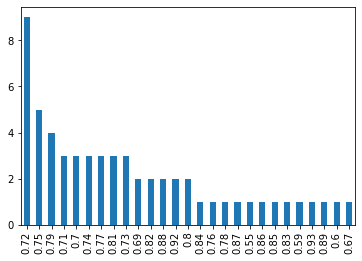

In [ ]:
df['color_score'].value_counts().plot(kind='bar')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


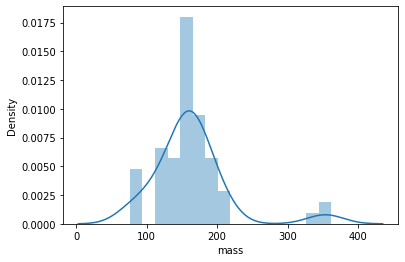

In [ ]:
sns.distplot(df['mass'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


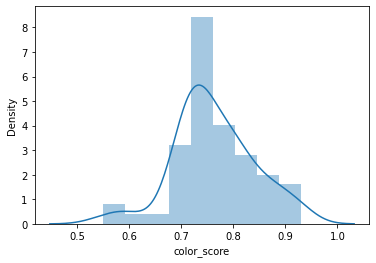

In [ ]:
sns.distplot(df['color_score'])
plt.show()

In [ ]:
df1=df[['fruit_label','mass','width','height','color_score']]
df1

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   mass         59 non-null     int64  
 2   width        59 non-null     float64
 3   height       59 non-null     float64
 4   color_score  59 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.4 KB


In [ ]:
X = df1[['mass','width','height','color_score']]
y = df1['fruit_label']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1) 

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(59, 4) (47, 4) (12, 4)


In [ ]:
model = LinearRegression()


In [ ]:
print(X_train)

    mass  width  height  color_score
31   210    7.8     8.0         0.82
37   154    7.3     7.3         0.79
24   342    9.0     9.4         0.75
0    192    8.4     7.3         0.55
51   116    6.0     7.5         0.72
40   154    7.1     7.5         0.78
20   160    7.5     7.5         0.86
14   152    7.6     7.3         0.69
22   140    7.3     7.1         0.87
29   160    7.0     7.4         0.81
26   362    9.6     9.2         0.74
49   132    5.8     8.7         0.73
42   154    7.2     7.2         0.82
52   118    5.9     8.0         0.72
35   150    7.1     7.9         0.75
36   160    7.1     7.6         0.76
6     80    5.9     4.3         0.81
44   200    7.3    10.5         0.72
18   162    7.5     7.1         0.83
11   172    7.1     7.6         0.92
54   116    6.1     8.5         0.71
30   158    7.1     7.5         0.79
9    172    7.4     7.0         0.89
27   204    7.5     9.2         0.77
19   162    7.4     7.2         0.85
55   116    6.3     7.7         0.72
5

In [ ]:
print(y_train)

31    3
37    3
24    3
0     1
51    4
40    3
20    1
14    1
22    1
29    3
26    3
49    4
42    3
52    4
35    3
36    3
6     2
44    4
18    1
11    1
54    4
30    3
9     1
27    3
19    1
55    4
58    4
47    4
15    1
1     1
32    3
12    1
43    4
50    4
21    1
41    3
45    4
34    3
2     1
8     1
4     2
3     2
48    4
7     2
39    3
23    1
57    4
Name: fruit_label, dtype: int64


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.5632130249327425
R2 Score: 0.6024378647533583
MAE: 0.573422073542448


In [ ]:
model=Lasso(alpha=0.1)
#Train the model on the training data
model.fit(X_train,y_train)
#make the predictions on the test data
y_pred=model.predict(X_test)
#Evaluate the perfomance of the model
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.699645213983657
R2 Score: 0.5061327901291832
MAE: 0.6961673571697751


In [ ]:
#Ridge Regression
#creating a Ridge Regression model
model=Ridge(alpha=10)
#train the model on the training data
model.fit(X_train,y_train)
#MAke predictions on the test data
y_pred=model.predict(X_test)
#Evaluate the performance of the model
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.7717710264831487
R2 Score: 0.455220451894248
MAE: 0.7582136844221955


In [ ]:
#KNN Regression
#create a KNN Regression model
model=KNeighborsRegressor()
#Train the model on the training data
model.fit(X_train,y_train)
#MAke the predictions on the test data
y_pred=model.predict(X_test)
#Evaluate the performance of the model
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.33
R2 Score: 0.7670588235294118
MAE: 0.4500000000000001


In [ ]:
#Regression Tree
#Create a Decision Tree Regression model
model=DecisionTreeRegressor(max_depth=10)
#Train the model on the training data 
model.fit(X_train,y_train)
#make predictions on the test data
y_pred=model.predict(X_test)
#Evaluate the performance of the model
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

MSE: 0.3333333333333333
R2 Score: 0.7647058823529411
MAE: 0.16666666666666666


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski')

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[3 0 0 1]
 [0 1 0 0]
 [0 0 3 1]
 [0 1 0 2]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.50      1.00      0.67         1
           3       1.00      0.75      0.86         4
           4       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.75      0.79      0.74        12
weighted avg       0.83      0.75      0.77        12



In [ ]:
error_rate=[]
for i in range(1,48):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

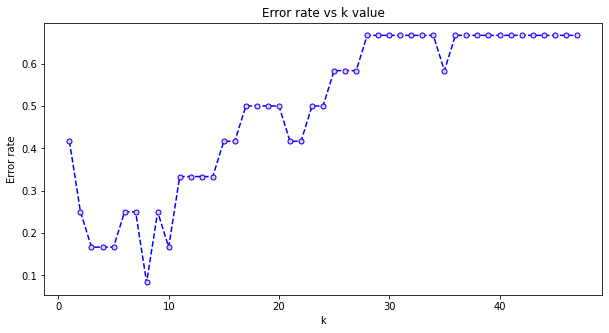

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,48),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='pink',markersize=5)
plt.title('Error rate vs k value')
plt.xlabel('k')
plt.ylabel("Error rate")

In [ ]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH k=25')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH k=25


[[3 0 0 1]
 [0 1 0 0]
 [0 0 3 1]
 [0 1 0 2]]


              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.50      1.00      0.67         1
           3       1.00      0.75      0.86         4
           4       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.75      0.79      0.74        12
weighted avg       0.83      0.75      0.77        12



In [ ]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.75
